In [27]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [28]:
data_dir = Path('Pitch_Tables')
file_names = [file.name for file in data_dir.glob('*') if 'csv' in file.name and 'table' in file.name and 'lock' not in file.name] 
file_names



['pitch_table.1112.csv',
 'pitch_table.09.csv',
 'pitch_table.13.csv',
 'pitch_table.10.csv',
 'pitch_table.May08.July08.csv',
 'pitch_table.14.csv',
 'pitch_table.Aug08.Dec08.csv',
 'pitch_table.Jan08.April08.csv']

In [42]:
sample_file = 'Pitch_Tables/' + file_names[1]
sample_dat = pd.read_csv(sample_file)

/Users/jaxmichalski/miniconda3/envs/data100/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,57,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
sample_dat.head()

,retro_game_id,year,st_fl,regseason_fl,playoffs_fl,game_type,game_type_des,game_id,home_team_id,home_team_lg,...,break_y,break_angle,break_length,pitch_type,pitch_type_seq,type_conf,zone,spin_dir,spin_rate,sv_id
0,COL200902250,2009,T,F,F,S,Spring Training,unknown,col,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COL200902250,2009,T,F,F,S,Spring Training,unknown,col,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COL200902250,2009,T,F,F,S,Spring Training,unknown,col,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COL200902250,2009,T,F,F,S,Spring Training,unknown,col,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COL200902250,2009,T,F,F,S,Spring Training,unknown,col,NL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
sample_dat = sample_dat[(sample_dat['game_type_des'] != 'Spring Training')]
sample_dat = sample_dat[sample_dat['game_type_des'] != 'Unknown']
sample_dat.head()

,retro_game_id,year,st_fl,regseason_fl,playoffs_fl,game_type,game_type_des,game_id,home_team_id,home_team_lg,...,break_y,break_angle,break_length,pitch_type,pitch_type_seq,type_conf,zone,spin_dir,spin_rate,sv_id
85355,PHI200904050,2009,F,T,F,R,Regular Season,244193,phi,NL,...,23.8,15.5,3.4,FF,FF,0.905,11.0,192.579,2163.648,090405_201041
85356,PHI200904050,2009,F,T,F,R,Regular Season,244193,phi,NL,...,23.7,11.8,3.7,FF,FF|FF,0.905,11.0,192.330,2014.262,090405_201052
85357,PHI200904050,2009,F,T,F,R,Regular Season,244193,phi,NL,...,23.8,29.1,6.9,CH,FF|FF|CH,0.901,4.0,234.283,2025.121,090405_201104
85358,PHI200904050,2009,F,T,F,R,Regular Season,244193,phi,NL,...,23.8,14.8,3.5,FF,FF,0.905,7.0,194.810,2124.747,090405_201142
85359,PHI200904050,2009,F,T,F,R,Regular Season,244193,phi,NL,...,23.8,21.2,3.9,FF,FF,0.903,13.0,200.922,2045.904,090405_201220


In [50]:
sample_dat.columns
smaller_dat = sample_dat.drop(columns = ['year', 'st_fl', 'regseason_fl', 'playoffs_fl',
       'game_type', 'game_type_des', 'game_id', 'home_team_id', 'home_team_lg',
       'away_team_id', 'away_team_lg', 'interleague_fl', 'inning',
       'bat_home_id', 'park_id', 'park_name', 'park_lock', 'bat_id', 'pa_ball_ct', 'pa_strike_ct', 'outs_ct',
        'pa_terminal_fl', 'start_bases_cd',
       'end_bases_cd', 'event_outs_ct', 'ab_number', 'pa_event_cd', 'type_conf', 'retro_game_id', 'sv_id', 'pitch_id'])
smaller_dat.columns

Index(['pit_id', 'pit_hand_cd', 'bat_hand_cd', 'pitch_seq', 'pitch_res',
       'pitch_des', 'x', 'y', 'start_speed', 'end_speed', 'sz_top', 'sz_bot',
       'pfx_x', 'pfx_z', 'px', 'pz', 'x0', 'y0', 'z0', 'vx0', 'vy0', 'vz0',
       'ax', 'ay', 'az', 'break_y', 'break_angle', 'break_length',
       'pitch_type', 'pitch_type_seq', 'zone', 'spin_dir', 'spin_rate'],
      dtype='object')

In [51]:
smaller_dat.head()

,pit_id,pit_hand_cd,bat_hand_cd,pitch_seq,pitch_res,pitch_des,x,y,start_speed,end_speed,...,ay,az,break_y,break_angle,break_length,pitch_type,pitch_type_seq,zone,spin_dir,spin_rate
85355,408206,R,L,B,B,Ball,160.52,132.11,90.6,83.4,...,28.424,-12.866,23.8,15.5,3.4,FF,FF,11.0,192.579,2163.648
85356,408206,R,L,BC,C,Called Strike,136.48,123.47,90.4,82.6,...,30.841,-14.211,23.7,11.8,3.7,FF,FF|FF,11.0,192.330,2014.262
85357,408206,R,L,BCX,X,"In play, out(s)",121.89,131.24,84.5,77.4,...,26.762,-22.090,23.8,29.1,6.9,CH,FF|FF|CH,4.0,234.283,2025.121
85358,408206,R,R,X,X,"In play, out(s)",112.45,151.97,91.1,83.8,...,29.558,-13.296,23.8,14.8,3.5,FF,FF,7.0,194.810,2124.747
85359,408206,R,L,B,B,Ball,153.65,145.06,91.8,84.1,...,31.265,-14.464,23.8,21.2,3.9,FF,FF,13.0,200.922,2045.904


In [52]:
# In
# * Pitch Speed 
# * Spin Rate
# * Spin Angle 
# * Position at plate (x,y,z)
# * Pitch Handedness (R = 1, L = 0)
# * Batter handedness (R = 1, L = 0)
# * Pitch Type (#)
# * Previous Pitch Type  (#)
# * Decision point (time, x, y, z)

# Out
# * Pitch Result
#     * In zone (1-9) 
#     * Out of zone (11-14)
#     * In play out(s)
#     * In play no out(s) & In play run(s)



smaller_dat['pit_hand_cd'] = smaller_dat['pit_hand_cd'].replace(to_replace = ['L', 'R'], value = [0, 1])
smaller_dat['bat_hand_cd'] = smaller_dat['bat_hand_cd'].replace(to_replace = ['L', 'R'], value = [0, 1])

In [61]:

no_nans = smaller_dat.dropna()
smaller_dat = no_nans
pitches = np.sort(smaller_dat.pitch_type.unique())
threshold = smaller_dat.groupby('pitch_type').size() > smaller_dat.groupby('pitch_type').size().sum() * 0.01

sig_pitches = pitches[threshold]

smallest_dat = smaller_dat[[pitch_type in sig_pitches for pitch_type in smaller_dat['pitch_type']]]
smallest_dat['pitch_type'].unique()
print(smallest_dat.groupby('pitch_type').size())

pitch_type
CH     70258
CU     58760
FC     35969
FF    255114
FS      9740
FT     72180
SI     96804
SL    105564
dtype: int64


In [67]:
smallest_dat['pitch_type'].unique()
smallest_dat.columns
smallest_dat['pitch_type'] = smallest_dat['pitch_type'].replace(to_replace = sig_pitches, value = np.linspace(0, len(sig_pitches) - 1, len(sig_pitches)))

/Users/jaxmichalski/miniconda3/envs/data100/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [82]:
results = []
nums = np.linspace(0, len(sig_pitches) - 1, len(sig_pitches))

for elem in smallest_dat['pitch_type_seq']:
    sequence = elem.split('|')
    if len(sequence) != 1:
        pitch = sequence[-1]
        previous = sequence[-2]
        x = pitch == sig_pitches 
        y = previous == sig_pitches
        results += [[nums[y], nums[x]]]
    else:
        pitch = sequence[-1]
        x = pitch == sig_pitches 
        results += [[nums[x]]]

In [88]:
smallest_dat['pitch_sequence'] = results
smallest_dat['pitch_sequence'].head()

/Users/jaxmichalski/miniconda3/envs/data100/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


85355           [[3.0]]
85356    [[3.0], [3.0]]
85357    [[3.0], [0.0]]
85358           [[3.0]]
85359           [[3.0]]
Name: pitch_sequence, dtype: object

In [93]:
smallest_dat['pitch_des'] = smallest_dat['pitch_des'].replace(to_replace = ['Foul Bunt', 'Foul (Runner Going)', 'Missed Bunt', 'Swinging Strike (Blocked)', 'Foul Tip', 'Ball In Dirt', 'Hit By Pitch'], value = ['Foul', 'Foul', 'Swinging Strike', 'Swinging Strike', 'Foul', 'Ball', 'Ball'])
smallest_dat['pitch_des'].unique()



/Users/jaxmichalski/miniconda3/envs/data100/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array(['Ball', 'Called Strike', 'In play, out(s)', 'Swinging Strike',
       'In play, no out', 'In play, run(s)', 'Foul'], dtype=object)

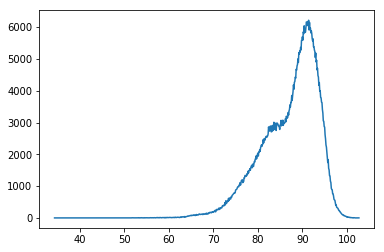

In [63]:
speeds = smallest_dat.groupby('start_speed').size()
plt.plot(speeds)

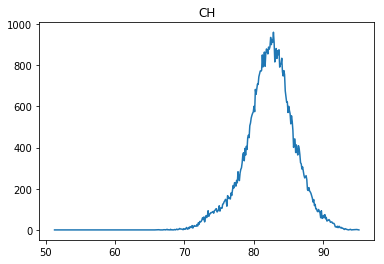

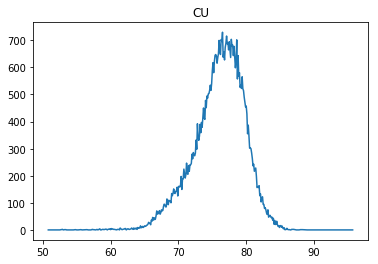

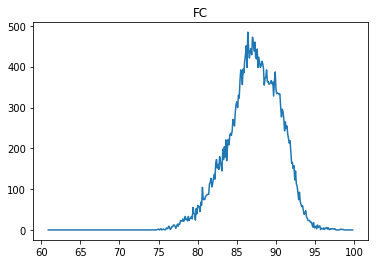

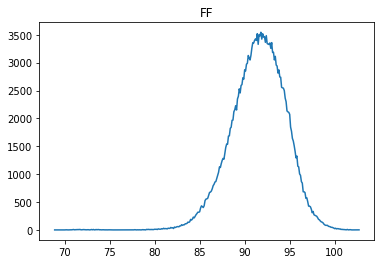

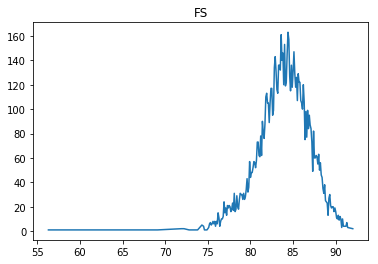

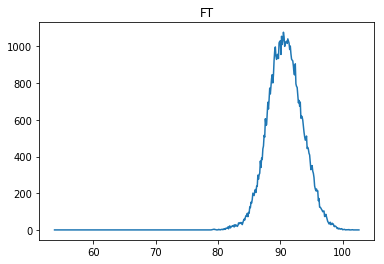

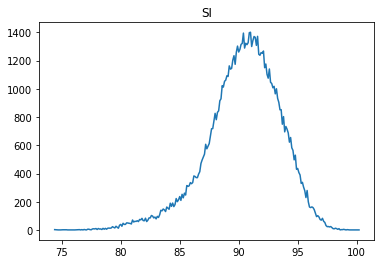

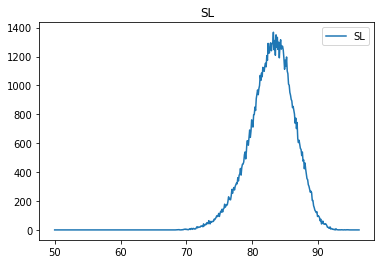

In [64]:
speed_by_type = smallest_dat.groupby(['pitch_type', 'start_speed']).size()
for p_type in sig_pitches:
    plt.figure()
    plt.plot(speed_by_type[p_type], label = p_type)
    plt.title(p_type)

plt.legend()